<a href="https://colab.research.google.com/github/ymei9/Seoul_bike_usage/blob/main/Predicting_Seoul_Bike_Demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Future Bike Demand in Seoul

**By: Arpit Jain, Tingting Cao, Zhenyang Gai, Sihoon (Daniel) Yu, Yuxuan Mei**

---





<img src="https://github.com/arp-jain/ba-780-team5-public/blob/main/bike_station.jpeg?raw=true" align="center"/> 

##### Source: Xara Brianna

# Executive summary

In this work, our team performed exploratory data analysis (EDA) for the Seoul Bike Rental dataset. We examined all numerical and categorical features, and our target of prediction, which is hourly bike rental demand in Seoul. We also created tables and plots to visualize the relationship between all variables, and see rental demand changes over time and/or at different weather conditions. Moreover, we fitted the training dataset into several models such as linear regression, polynomial regression and random forest to further predict hourly rental bike demand.



# Problem Definition 

Our goal is to use the Seoul Bike Rental database to predict future bike demand based on attributes such as seasons, the weather conditions, and the number of bikes rented per hour. The bikes are are rented out by app based companies such as Seoul Bike.

Currently rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bikes available and accessible to the public at the right time as it decreases the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. Managing the fleet of rental bikes is an important task for Seoul Bike so they can maximize the number of rentals. 



<img src="https://github.com/arp-jain/ba-780-team5-public/blob/main/Bike_App_Store.jpg?raw=true" align="center" width="250"/> 

# Rented Bike Count

Our target feature is the Rented Bike Count in the dataset. This feature is updated hourly letting us know how many bikes are being rented. This feature is important because it allows us to determine how many users rented a bike during that particular hour. Using the other features in the dataset we can predict future bike demand. 

We expect that during inclement weather that the number of rented bikes will be lower, during the colder seasons it will be lower, and during night time hours the amount of bikes rented will be lower. 

# Data

**Seoul Bike Sharing Demand Data Set**

We downloaded the dataset from the University of California-Irvine Machine Learning Repository which can be found [here](https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand).

Each row in the dataset represents an hour during a day in which the number of rented bikes are counted, as well as date/time info, and various weather information. There is also a feature if the day was a functioning day or not. 

*   **Date**: Date of data point in MM/DD/YYYY format
*   **Rented Bike Count**: The count of rented bikes per hour 
* **Hour**: The hour of day in 24 h format (0-23) 
* **Temperature(°C)**: The temperature in Celsius
* **Humidity(%)**: The humidity in percentages (0-100) 
* **Wind Speed (m/s)**: The wind speed in meters/second 
* **Visibility (10 m)**: The visibility in meters
* **Dew Point temperature (°C)**: The temperature at which water vapor will condense 
* **Solar Radiation (MJ/m2)**: The amount of solar radiation in megajoules per square meter
* **Rainfall (mm)**: The amount of rainfall in mm 
* **Snowfall (cm)**: THe amount of snow in cm 
* **Seasons**: The current season (Spring, Summer, Fall, Winter) 
* **Functioning Day**: Whether the day was a functioning days for the bike rentals (Yes or No) 

**Basic Information**: 
* 8760 rows 
* There are 14 columns with 13 features and 1 target of prediction  
* No missing values, and all features are the data type they are supposed to be 


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

df = pd.read_csv("https://raw.githubusercontent.com/arp-jain/BA780teamproject/main/SeoulBikeData%20(1).csv?token=AUXTM22TDCKUZ7G2GQMZIFTBMMDZM",encoding='ISO-8859-1')
df.head(3)

Date  Rented Bike Count  Hour  ...  Seasons     Holiday  Functioning Day
0  01/12/2017                254     0  ...   Winter  No Holiday              Yes
1  01/12/2017                204     1  ...   Winter  No Holiday              Yes
2  01/12/2017                173     2  ...   Winter  No Holiday              Yes

[3 rows x 14 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

The Dataset has no missing values. So we can skip the process of replaceing values and imputation.

## Target variable

We are trying to predict hourly rental bike demand. Therefore it is a numerical prediction problem, and we first would like to examine the distribution of rented bike count by hour.

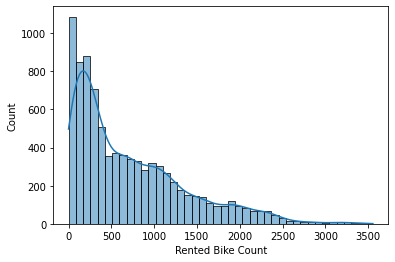

In [ ]:
sns.histplot(data=df,x='Rented Bike Count',kde=True)

From this plot we can see that there is a left distribution of bikes rented out with the most common number of bikes being rented out per hour between 0 and 500.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'When is the best time to repair the bikes?')

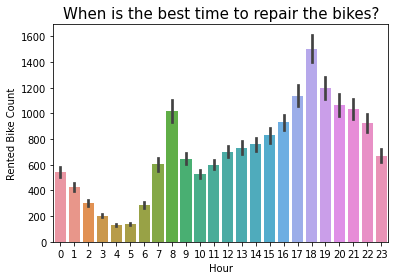

In [ ]:
sns.barplot('Hour','Rented Bike Count',data=df)
plt.title("When is the best time to repair the bikes?", fontsize = 15)

From this plot we can see that most bikes are rented out in two peaks. One of the peaks is during the morning around 8 am, and the other peak is during the evening around 6 pm. We can explore this further and determine if the peaks are due to the office rush during the weekday, or can be during the weekend as well. Therefore, if the company were to take some of the bikes for repair, they should choose when there is the least demand, which is 4-5 AM.

In [ ]:
type(df['Date'])

pandas.core.series.Series

In [ ]:
df['Weekday'] = df['Date'].apply(pd.to_datetime).dt.dayofweek

Here we created a new column called 'Weekday' where depending on the day of the week a number is assigned. A weekday is assigned 1-5 (Mon-Fri), and a weekend day is assigned 6-7 (Sat-Sun). 

In [ ]:
df['Weekday']

0       3
1       3
2       3
3       3
4       3
       ..
8755    4
8756    4
8757    4
8758    4
8759    4
Name: Weekday, Length: 8760, dtype: int64

Text(0.5, 1.0, 'Bikes rented during weekdays')

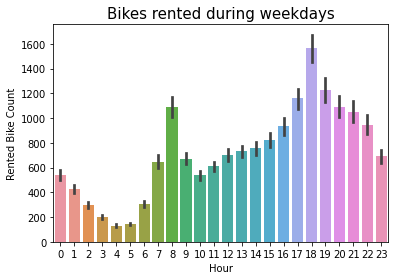

In [ ]:
#Plotting rented bikes during the weekday
sns.barplot(x='Hour', y='Rented Bike Count',
            data=df.loc[df['Weekday'] <6],
           )
plt.title("Bikes rented during weekdays",fontsize=15)

Text(0.5, 1.0, 'Bikes rented during weekends')

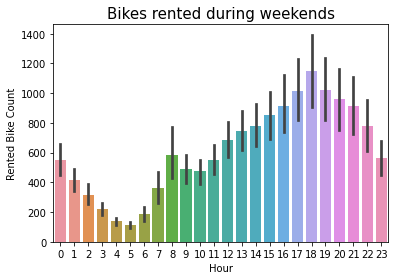

In [ ]:
#Plotting rented bikes during the weekend
sns.barplot(x='Hour', y='Rented Bike Count',
            data=df.loc[df['Weekday'] >5],
           )
plt.title("Bikes rented during weekends",fontsize=15)

From this we can see that there is certainly a surge in bikes rented during the weekdays, but there are also peaks around the same time during the weekends. The peaks during the weekends are generally not as high, and has a lower low than during the weekdays. 

## Getting insight using pivot tables and aggregation functions

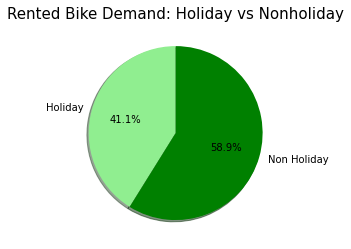

In [ ]:
group = df.groupby("Holiday")
audience = list(df.groupby("Holiday").agg({'Rented Bike Count':'mean'})['Rented Bike Count'])

types = ['Holiday','Non Holiday']



colors = ['lightgreen','green']
plt.pie(audience,
       labels=types,  
       autopct='%1.1f%%', 
       colors=colors,  
        startangle=90,  
         
        shadow=True  
       )
plt.title("Rented Bike Demand: Holiday vs Nonholiday", fontsize=15)
plt.show()

Holiday vs Non-Holiday could be a significant factor in deciding the sharing-bike stations. If simply consider the two categories as "leisure vs work", then having 58.9% for non-holiday would encourage the company to make stations in close proximity from work places or public transportation stations.

In [ ]:
df.pivot_table(values='Rented Bike Count', index='Seasons', columns='Holiday', aggfunc='mean')

Holiday      Holiday   No Holiday
Seasons                          
Autumn    758.483333   823.151163
Spring    635.305556   733.224251
Summer   1022.145833  1034.338426
Winter    156.625000   232.264736

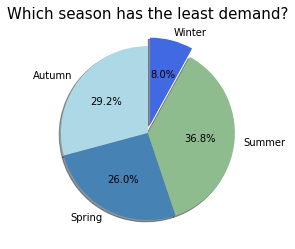

In [ ]:
audience = list(df.groupby("Seasons").agg({'Rented Bike Count':'mean'})['Rented Bike Count'])

types = ['Autumn','Spring','Summer','Winter']



colors = ['lightblue','steelblue','darkseagreen','royalblue']
plt.pie(audience,
       labels=types,  
       autopct='%1.1f%%', 
       colors=colors,  
        startangle=90,  
        explode = [0,0,0,0.1],  
        shadow=True  
       )
plt.title("Which season has the least demand?", fontsize=15)
plt.show()

In [ ]:
df.pivot_table(values='Rented Bike Count', index='Hour', columns='Seasons', aggfunc='mean')

Seasons       Autumn       Spring       Summer      Winter
Hour                                                      
0         623.681319   470.630435   899.065217  165.177778
1         485.714286   356.032609   698.771739  159.055556
2         331.846154   247.467391   505.750000  117.788889
3         225.538462   164.815217   342.673913   77.811111
4         148.593407   105.869565   223.815217   50.477778
5         143.659341   113.652174   245.934783   51.222222
6         316.032967   251.641304   485.836957   92.822222
7         702.186813   601.913043   902.782609  209.566667
8        1197.230769  1013.847826  1418.597826  422.200000
9         755.197802   655.815217   911.000000  254.600000
10        636.670330   558.478261   723.500000  186.400000
11        714.714286   666.652174   786.858696  228.322222
12        831.934066   818.195652   875.967391  263.633333
13        892.483516   866.826087   890.195652  275.255556
14        942.472527   905.543478   894.673913  284.288889
15       1029.593407   969.434783  1009.717391  298.644444
16       1151.098901  1077.510870  1174.173913  308.577778
17       1391.131868  1279.543478  1526.293478  342.511111
18       1765.384615  1652.586957  2135.141304  438.300000
19       1349.021978  1220.586957  1889.250000  304.033333
20       1176.461538  1037.456522  1801.923913  243.233333
21       1116.032967   998.923913  1754.065217  240.500000
22       1006.010989   877.913043  1567.869565  225.133333
23        737.659341   609.413043  1153.902174  173.433333

In [ ]:
df.groupby("Functioning Day").agg({'Rented Bike Count':'sum'})

Rented Bike Count
Functioning Day                   
No                               0
Yes                        6172314

From the table and plots above we can conclude that:

* Seoul bike rental demand in winter is the least among all seasons. 
* Bike rental demand during non-holidays are more than that during holidays. 
* For non-functioning days no bike was rented out. This indicates the bike rental business is closed on non-functioning days.

## Numerical features

There are ten numerical columns: Rented Bike Count, Hour, Temperature(°C), Humidity(%), Wind speed (m/s), Visibility (10 m), Dew point temperature(°C), Solar Radiation (MJ/m2), Rainfall(mm)	and Snowfall (cm).

We created a scatter matrix for all numerical columns to examine the relationship between every two variables. 

In [ ]:
df.describe()

Rented Bike Count         Hour  ...  Snowfall (cm)      Weekday
count        8760.000000  8760.000000  ...    8760.000000  8760.000000
mean          704.602055    11.500000  ...       0.075068     3.021918
std           644.997468     6.922582  ...       0.436746     1.999994
min             0.000000     0.000000  ...       0.000000     0.000000
25%           191.000000     5.750000  ...       0.000000     1.000000
50%           504.500000    11.500000  ...       0.000000     3.000000
75%          1065.250000    17.250000  ...       0.000000     5.000000
max          3556.000000    23.000000  ...       8.800000     6.000000

[8 rows x 11 columns]

                           Rented Bike Count  ...       Weekday
Rented Bike Count                   1.000000  ... -2.157677e-02
Hour                                0.410257  ... -7.324009e-20
Temperature(°C)                     0.538558  ... -4.117209e-03
Humidity(%)                        -0.199780  ... -1.961674e-02
Wind speed (m/s)                    0.121108  ... -3.163420e-02
Visibility (10m)                    0.199280  ...  2.987013e-02
Dew point temperature(°C)           0.379788  ... -1.602018e-02
Solar Radiation (MJ/m2)             0.261837  ... -8.077327e-05
Rainfall(mm)                       -0.123074  ... -6.823037e-03
Snowfall (cm)                      -0.141804  ... -3.146208e-02
Weekday                            -0.021577  ...  1.000000e+00

[11 rows x 11 columns]


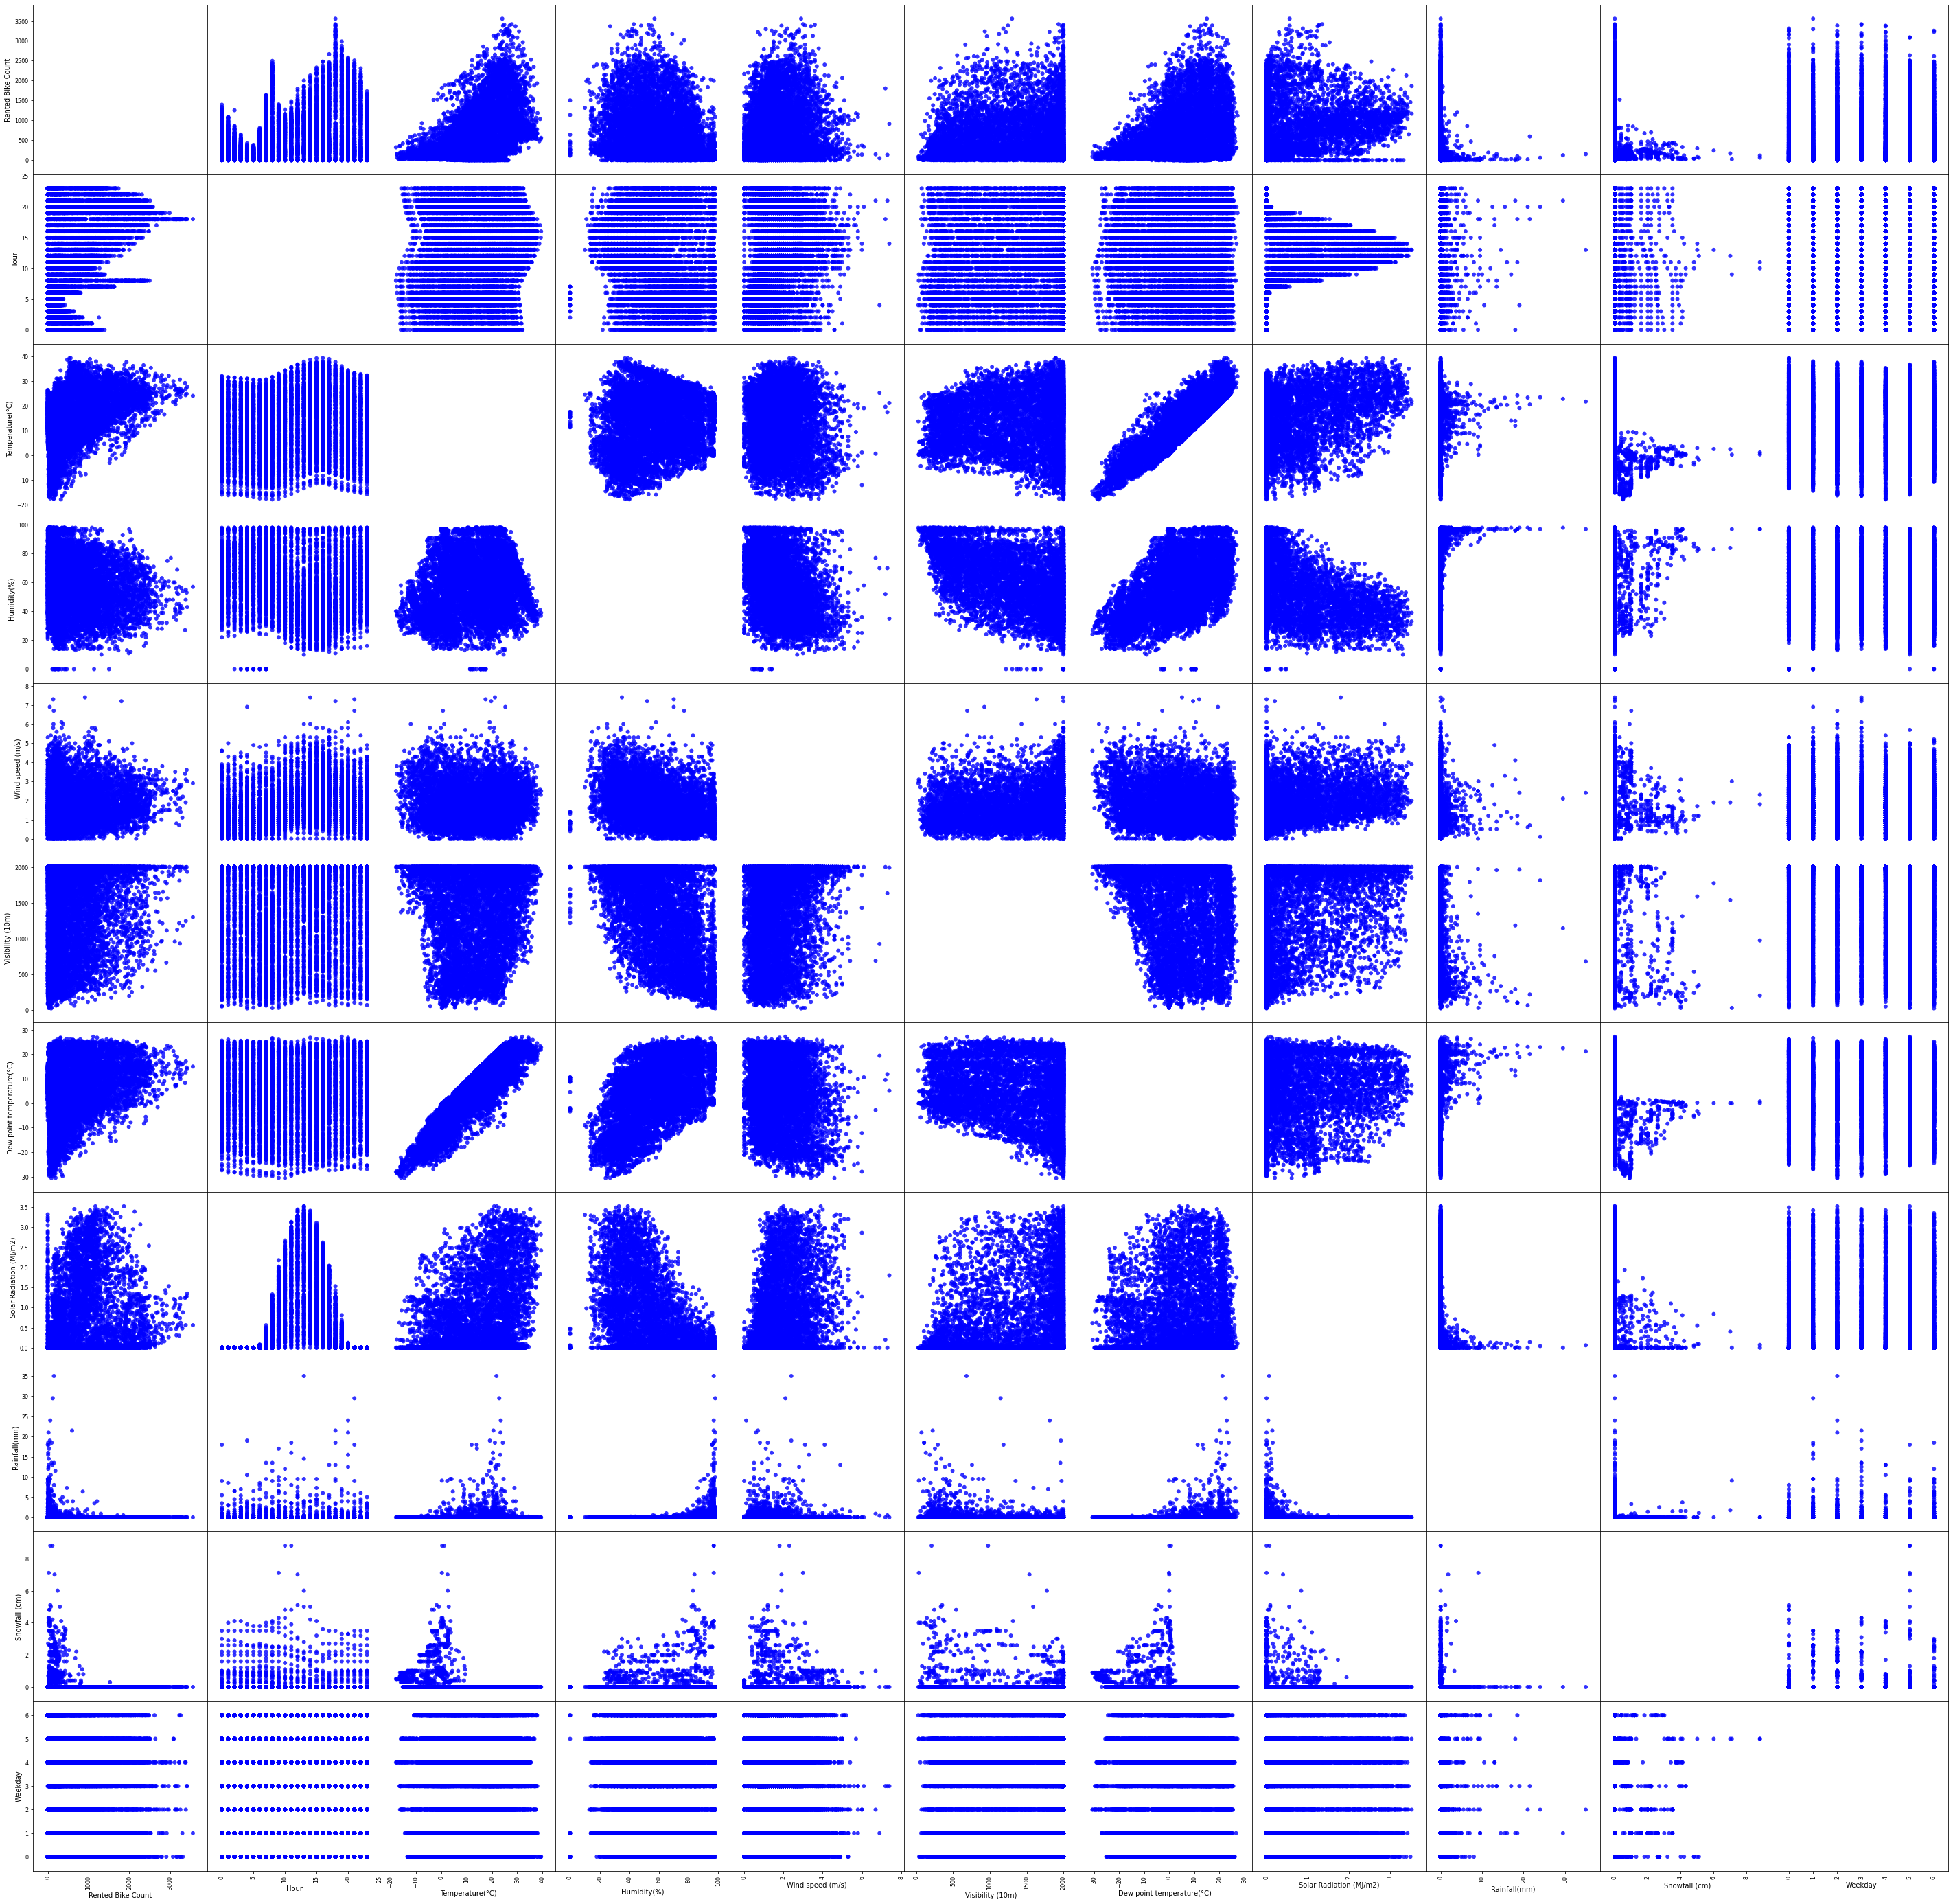

In [ ]:
print(df.corr())

fig = pd.plotting.scatter_matrix(df,figsize=(50,50),c ='blue',marker = 'o',diagonal='',alpha = 0.8,range_padding=0.2)  
#plt.savefig('1.png',dpi=300)
plt.show()

Among all pairwise correlation plots, we find a strong linear relationship between temperature and dew point temperature.

In [ ]:
df.groupby("Hour").agg({'Rented Bike Count':'sum'})

Rented Bike Count
Hour                   
0                197633
1                155557
2                110095
3                 74216
4                 48396
5                 50765
6                104961
7                221192
8                370731
9                235784
10               192655
11               219311
12               255296
13               267635
14               276971
15               302653
16               339677
17               415556
18               548568
19               436229
20               390172
21               376479
22               336821
23               244961

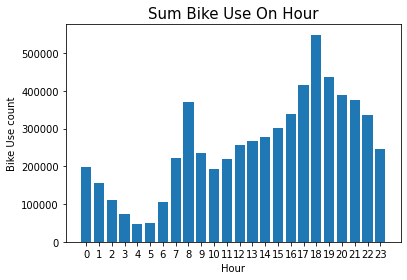

In [ ]:
number=list(df.groupby("Hour").agg({'Rented Bike Count':'sum'})['Rented Bike Count'])
l = list(range(24))
plt.bar(range(len(number)), number, tick_label=l)
plt.title('Sum Bike Use On Hour', fontsize=15)
plt.ylabel('Bike Use count')
plt.xlabel('Hour')
plt.show()

In [ ]:
number=list(df.groupby("Humidity(%)").agg({'Rented Bike Count':'sum'})['Rented Bike Count'])
l = list(df.groupby("Humidity(%)").agg({'Rented Bike Count':'sum'}).index)

plt.figure(figsize=(20, 6))
plt.bar(range(len(number)), number, tick_label=l)
plt.title('Sum Bike Use On Humidity(%)', fontsize=15)
plt.ylabel('Bike Use count')
plt.xlabel('Humidity(%)')
plt.show()

This graph can be better explained when we combine it with the Seasonal Rental Bike pie chart. Solely from this graph, one might assume that users have the highest tendency to rent bikes in between 42 to 55%. While it is true, however, from the pie chart we observed that the demand is the highest during summer. Therefore, we can conclude that the reason behind the bike use count being the highest in between 42 to 55% humidity is due to the number of days with those humidity % being the highest, making the accumulated number greater.

In [ ]:
df.groupby("Temperature(°C)").agg({'Rented Bike Count':'sum'})

Rented Bike Count
Temperature(°C)                   
-17.8                          322
-17.5                          291
-17.4                           64
-16.9                           36
-16.5                           96
...                            ...
 38.0                         1184
 38.7                          475
 39.0                         1033
 39.3                          531
 39.4                          561

[546 rows x 1 columns]

In [ ]:
import datetime
weekDays = ("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday")

In [ ]:
# convert Date column to datetime object
df['Date']= pd.to_datetime(df['Date'], format='%d/%m/%Y')
# new dataframe grouped by days in the week
df_days = df.groupby('Date').sum()

In [ ]:
df_days.reset_index(inplace=True)

In [ ]:
temp=[]
for i in range(len(df_days)):
    temp.append(df_days['Date'][i].weekday())
df_days['Day_of_week'] = temp

In [ ]:
day_of_week = df_days.groupby('Day_of_week').sum()['Rented Bike Count'].to_frame().reset_index()

In [ ]:
for i in range (len(day_of_week)):
  day_of_week['Day_of_week'][i] = weekDays[day_of_week['Day_of_week'][i]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
plt = sns.lineplot(data = day_of_week, 
             x = 'Day_of_week', y = 'Rented Bike Count',
             marker='o')

plt.set_title('Rented Bikes vs. Day of the Week')
plt.tick_params(labelrotation=45)
sns.despine(right=True, top=True, ax=plt)

From the graph we see that the bikes rented is mostly flat during the weekdays, and drops the most on Sunday.

Text(0.5, 0.98, 'Rented Bikes Seasonal Distribution')

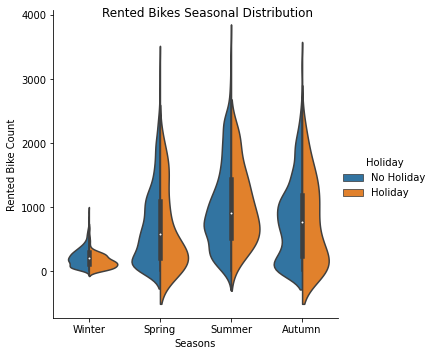

In [ ]:
# a similiar plot
plt = sns.catplot(data=df, x= 'Seasons', y ='Rented Bike Count', kind="violin", hue='Holiday', split=True)
plt.fig.suptitle("Rented Bikes Seasonal Distribution")

This violin plot again shows us that the distribution of bikes rented out, and that there's not much of a difference when looking at holidays, and non-holidays.

In [ ]:
# KDE plot on humidity
sns.kdeplot(data=df, x= 'Humidity(%)', y ='Rented Bike Count', hue='Holiday')

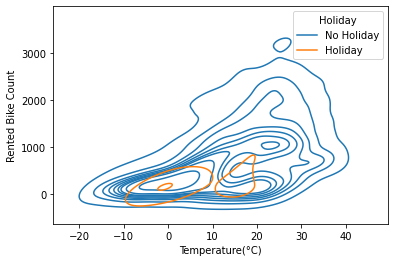

In [ ]:
sns.kdeplot(data=df, x= 'Temperature(°C)', y ='Rented Bike Count', hue='Holiday')

## Categorical features

This dataset has 3 categorical features:
* **Holiday, Seasons and	Functioning Day.**

From the explicit categorical datasets we can split them using dummy variables and Pandas get_dummies function. 

* We split the Holiday feature into 2 columns (is_Holiday and is_Holiday_no, with 1 representing a day with a holiday, and 0 representing a day without a holiday.

* We also split the Seasons feature into 4 columns (is_Winter, is_Summer, is_Autumn, is_Spring) with a 1 representing if its that season, and a 0 representing if its not that season.

* The last categorical feature we have is the Functioning Day feature. This feature is if the bike company is functioning that day, and allowing rentals. We split this into 2 columns (is_Functioning_Day_yes, is_Functioning_Day_no).  

In [ ]:
sns.relplot(data=df, x= 'Hour', y ='Rented Bike Count', col = 'Seasons', row = 'Holiday', hue = 'Seasons')

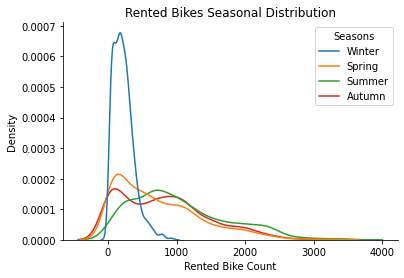

In [ ]:
plt = sns.kdeplot(data=df, x= 'Rented Bike Count', hue='Seasons')
plt.set_title('Rented Bikes Seasonal Distribution')
sns.despine(right=True, top=True, ax=plt)

From the KDE plot above, we can tell during winter, daily rented bikes are clustered between 0-1000 with a high density, whereas the distribution of daily rented bikes in spring, summer, and autumn are spread out more evenly with a wider interquantile range

Correlation heatmap

In order to creat correlation heatmap, we conducted further data preprocessing and used one-hot encoding to encode the categorical features. We also dropped the 'No' columns for binary features.

In [ ]:
#Change data to datetimes and Extract month and day
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [ ]:
#Create dummy variables for Holiday, Functioning Day and Season

#Set all columns to 0 by default
df_w_dummy = pd.get_dummies(df,columns=['Holiday', 'Functioning Day','Seasons'],prefix=['is','is_Functioning_Day','is'])

In [ ]:
#Rearrange and name dataframe as bike
bike = df_w_dummy[['Rented Bike Count','Year','Month','Day','Hour','Temperature(°C)','Dew point temperature(°C)',
                   'Humidity(%)','Wind speed (m/s)','Visibility (10m)','Solar Radiation (MJ/m2)','Rainfall(mm)',
                   'Snowfall (cm)','is_Holiday','is_Functioning_Day_Yes','is_Winter','is_Summer','is_Autumn']]

Text(0.5, 1.0, 'Which features are the most correlated?')

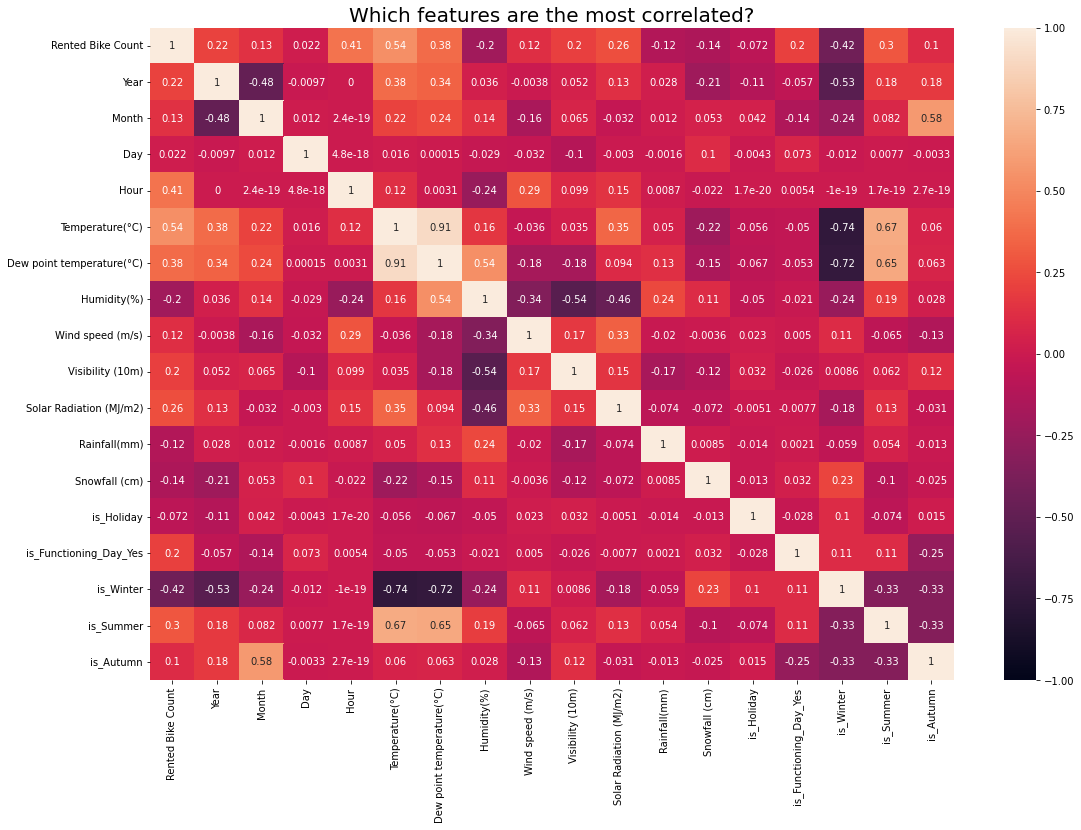

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 12))
sns.heatmap(bike.corr(),vmin=-1,vmax=1,annot=True)
plt.title("Which features are the most correlated?", fontsize=20)

We ran this analysis to examine whether some of the predictors cause the issue of multicollinearity. Quickly we observed 0.91 correlation between temperature and dew point temperature, which is highly correlated. We decided to only keep Temperature. Winter and Summer also displayed high correlation with temperature. However, these predictors should be included for the purposes of categorizing dates into general timeframes and analyzing temperature in smaller scales. 

## Feature Importance
To get some preliminary feature importances we will use the Random Forest Regressor, a wellknown decision-tree based model. 

### Prepare Traning and Test Dataset

In [ ]:
X = bike.drop('Rented Bike Count',axis=1)
y = bike['Rented Bike Count']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Random Forest Model for Prediction



In [ ]:
X_test.head(3)

Year  Month  Day  ...  is_Winter  is_Summer  is_Autumn
4059  2018      5   19  ...          0          0          0
6914  2018      9   15  ...          0          0          1
233   2017     12   10  ...          1          0          0

[3 rows x 17 columns]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
y_pred = np.round(regressor.predict(X_test))

In [ ]:
RF_y_comparison=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
RF_y_comparison.head(5)

Actual  Predicted
4059     320      241.0
6914     580      481.0
233      226      417.0
982      165      187.0
5967     646      675.0

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Random Forest Regression Score:',regressor.score(X_test,y_test)*100)

Mean Absolute Error: 134.68645357686452
Mean Squared Error: 49582.61491628615
Root Mean Squared Error: 222.67154042734367
Random Forest Regression Score: 87.84574742455698


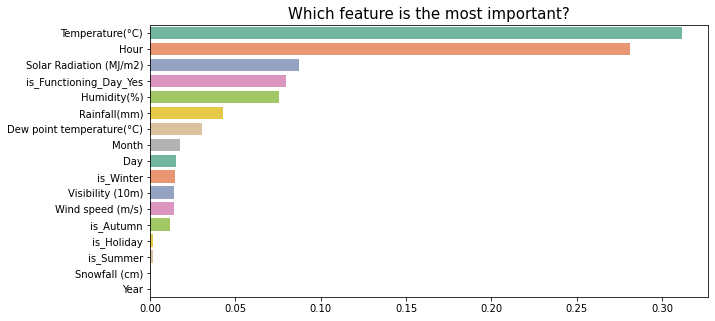

In [ ]:
# Plot features importances
import matplotlib.pyplot as plt
imp = pd.Series(data=regressor.feature_importances_, index=X_test.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
plt.title("Which feature is the most important?", fontsize=15)
ax = sns.barplot(y=imp.index, x=imp.values, palette="Set2", orient='h')

Weather features and the hour variable are good predictors for Bike Rental Demand. 

On the other hand, snowfall and Year are not important features.

It might be interesting to drop dew point temperature as it highly relates to temperature.


## Ridge Regression Model for Prediction

In [ ]:
from sklearn.linear_model import Ridge
regressor =Ridge(max_iter=50000,solver='cholesky')
regressor.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=50000,
      normalize=False, random_state=None, solver='cholesky', tol=0.001)

In [ ]:
y_pred = regressor.predict(X_test)
RF_y_comparison=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
RF_y_comparison

Actual    Predicted
4059     320   391.051380
6914     580   820.098765
233      226   566.682525
982      165   370.592109
5967     646  1307.811819
...      ...          ...
2909      96   579.506415
2244     358   532.165655
5121     128   419.180477
322      189   156.752517
2731     521   750.151190

[2628 rows x 2 columns]

In [ ]:
RF_y_comparison.dtypes

Actual         int64
Predicted    float64
dtype: object

In [ ]:
y_pred = np.round(y_pred)
y_pred

array([391., 820., 567., ..., 419., 157., 750.])

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Ridge Regression Score:',regressor.score(X_test,y_test)*100)

Mean Absolute Error: 322.9063926940639
Mean Squared Error: 185644.34474885845
Root Mean Squared Error: 430.8646478290583
Ridge Regression Score: 54.4918960694446


## Polynomial Regression Model for Prediction

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
pol_reg.fit(X_train,y_train)
pol_reg_train = pol_reg.score(X_train,y_train)
print(pol_reg_train) #Test

0.5568840237385757


In [ ]:
y_pred_pol = pol_reg.predict(X_test)
r_sq_test_pol = pol_reg.score(X_test,y_test)
print(r_sq_test_pol) #Test

0.5448938465073264


# Linear Regression Model For Prediction

Another type of regression we can look at is the Linear Regression, where we plot a simple line to determine the best fit for predictions. Here we are using the LinearRegression model from sklearn. 

In [ ]:
#Going to be using train, and test data from above
import numpy as np 
from sklearn.linear_model import LinearRegression

In [ ]:
#Creating model 
model = LinearRegression()
model.fit(X_train,y_train)
r_sq_train = model.score(X_train,y_train)
print(r_sq_train) #This is for the train data

0.5568840237385757


In [ ]:
y_pred = model.predict(X_test)
y_pred
r_sq_test = model.score(X_test,y_test)
print(r_sq_test) #This is for the test data

0.5448938465073264


Here we can see that the linear regression score is 0.54. While not the best score it can be improved with further feature engineering. 

# Cross Validation Model For Prediction

Another regression model we can use is the Cross-validation method where we repeatedly split the data into validation sets to train the model on. 

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=5)
print(cv_results)
print(np.mean(cv_results))

[-10.2334567   -0.77154426   0.25140034  -0.18179027   0.4377434 ]
-2.099529496384206


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=10)
print(cv_results)
print(np.mean(cv_results))

[-12.37966     -4.18163805  -0.37609285   0.45292654   0.06343567
  -0.01655934  -0.01606348   0.44079453   0.57989526   0.41778741]
-1.5015174304914298


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Solar Radiation on Hour')

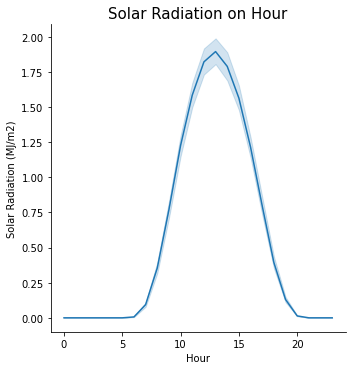

In [ ]:
sns.relplot('Hour','Solar Radiation (MJ/m2)',data=df,kind='line')
plt.title("Solar Radiation on Hour", fontsize = 15)

In [ ]:
df.loc[df['Functioning Day']=='No'].groupby(df['Date'])

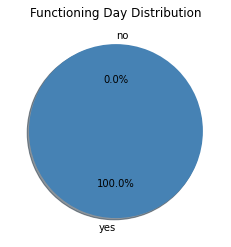

In [ ]:
group = df.groupby("Functioning Day")
audience = list(df.groupby("Functioning Day").agg({'Rented Bike Count':'sum'})['Rented Bike Count'])

types = ['no','yes']


colors = ['lightblue','steelblue','darkseagreen','b']
plt.pie(audience,
       labels=types,  
       autopct='%1.1f%%', 
       colors=colors,  
        startangle=90,  
        #explode = [0,0,0,0.2],  
        shadow=True  
       )
plt.title("Functioning Day Distribution")
plt.show()

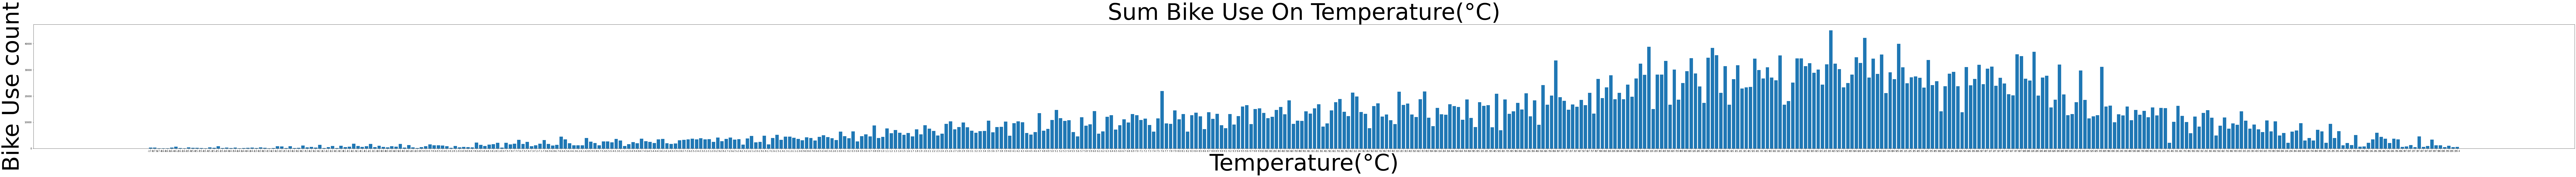

In [ ]:
number=list(df.groupby("Temperature(°C)").agg({'Rented Bike Count':'sum'})['Rented Bike Count'])
l = list(df.groupby("Temperature(°C)").agg({'Rented Bike Count':'sum'}).index)

plt.figure(figsize=(200, 10))
plt.bar(range(len(number)), number, tick_label=l)
plt.title('Sum Bike Use On Temperature(°C)', fontsize=100)
plt.ylabel('Bike Use count',fontsize=100)
plt.xlabel('Temperature(°C)',fontsize=100)
plt.show()

#Next Step

Next, we are going to perform necessary feature engineering for model improvement. We are also planning to perform k-fold cross-validation for each model to find their best hyperparameters. Based on model performance, we would like to find the best fit model to predict future bike demand in Seoul at a given hour.


# Code Citations 

[How to convert a date to a number representing the day of the week](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.dayofweek.html)

[Python Linear Regression example](https://realpython.com/linear-regression-in-python/)